In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [1]:
IMAGE_SIZE = [224, 224]
train_path = 'C:\\Users\\HOME\\Desktop\\train\*'
valid_path = 'C:\\Users\\HOME\\Desktop\\validation\*'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [3]:

folders = glob(train_path)

In [4]:
folders

['C:\\Users\\HOME\\Desktop\\train\\Alzeimer',
 'C:\\Users\\HOME\\Desktop\\train\\Cognitive Impairment',
 'C:\\Users\\HOME\\Desktop\\train\\pituitary',
 'C:\\Users\\HOME\\Desktop\\train\\Stroke']

In [7]:

x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
prediction

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense')>

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 244 images belonging to 4 classes.


In [7]:
test_set = test_datagen.flow_from_directory('validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 47 images belonging to 4 classes.


In [8]:
test_set.filenames

['Alzeimer\\ADNI_002_S_4521_MR_Axial_T2-Star__br_raw_20160324122521837_22_S402609_I662501.jpg',
 'Alzeimer\\ADNI_006_S_4960_MR_Axial_T2-Star__br_raw_20151116142521022_22_S308848_I554365.jpg',
 'Alzeimer\\ADNI_012_S_4094_MR_Axial_T2_STAR__br_raw_20170911112516152_22_S606978_I902073.jpg',
 'Alzeimer\\ADNI_013_S_4395_MR_AXIAL_T2__STAR_br_raw_20160408152851491_22_S413787_I675059.jpg',
 'Alzeimer\\ADNI_024_S_4169_MR_AXIAL_T2_STAR__br_raw_20150824183510226_22_S269703_I506435.jpg',
 'Alzeimer\\ADNI_035_S_4114_MR_Axial_T2_STAR__br_raw_20180927135557122_22_S730896_I1053100.jpg',
 'Alzeimer\\ADNI_037_S_4214_MR_Axial_T2_TSE_with_Fat_Sat__br_raw_20151016131541571_22_S285609_I527059.jpg',
 'Alzeimer\\ADNI_037_S_4302_MR_AX_T2_STAR_br_raw_20151202134651542_22_S321070_I568501.jpg',
 'Alzeimer\\ADNI_052_S_4626_MR_Axial_T2_Star__br_raw_20150416145050678_22_S255859_I487186.jpg',
 'Alzeimer\\ADNI_057_S_4888_MR_Axial_T2_Star__br_raw_20160810162606039_22_S490606_I765318.jpg',
 'Cognitive Impairment\\ADNI_03

In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HOME\AppData\Local\Temp\ipykernel_15036\2336048694.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
8/8 [==============================] - 36s 2s/step - loss: 1.4613 - accuracy: 0.4549 - val_loss: 0.8806 - val_accuracy: 0.4468
Epoch 2/30
8/8 [==============================] - 3s 352ms/step - loss: 0.4299 - accuracy: 0.7910 - val_loss: 0.3439 - val_accuracy: 0.8723
Epoch 3/30
8/8 [==============================] - 3s 353ms/step - loss: 0.3979 - accuracy: 0.7992 - val_loss: 0.3854 - val_accuracy: 0.7872
Epoch 4/30
8/8 [==============================] - 3s 343ms/step - loss: 0.4673 - accuracy: 0.7582 - val_loss: 0.5959 - val_accuracy: 0.6596
Epoch 5/30
8/8 [==============================] - 3s 343ms/step - loss: 0.4526 - accuracy: 0.7746 - val_loss: 0.7220 - val_accuracy: 0.6383
Epoch 6/30
8/8 [==============================] - 3s 348ms/step - loss: 0.2867 - accuracy: 0.8238 - val_loss: 0.3083 - val_accuracy: 0.8723
Epoch 7/30
8/8 [==============================] - 3s 345ms/step - loss: 0.2093 - accuracy: 0.9139 - val_loss: 0.2513 - val_accuracy: 0.9149
Epoch 8/30
8/8 [======

In [17]:
import matplotlib.pyplot as plt

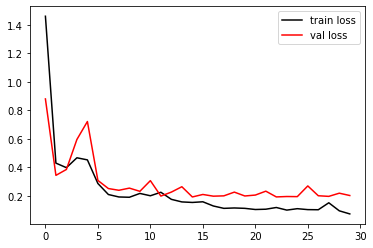

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="red")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




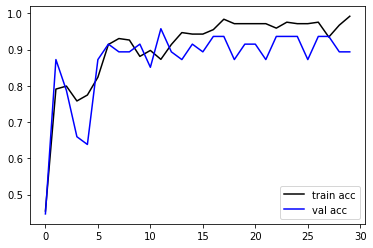

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="blue")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [9]:

from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')


In [10]:
model=load_model('model_vgg16.h5')

In [11]:
y_pred = model.predict(test_set)
y_pred

2/2 [==============================] - 20s 6s/step


array([[8.17925751e-01, 1.82070017e-01, 1.48098570e-06, 2.67871292e-06],
       [8.43531668e-01, 1.56247333e-01, 1.98130892e-05, 2.01171264e-04],
       [8.59958887e-01, 1.39765844e-01, 6.09835806e-05, 2.14297295e-04],
       [9.73994792e-01, 2.55307686e-02, 2.87268576e-05, 4.45704267e-04],
       [9.40941870e-01, 5.89528009e-02, 5.04313812e-06, 1.00230005e-04],
       [8.96067560e-01, 1.03909478e-01, 2.29672787e-06, 2.07119283e-05],
       [9.60986197e-01, 2.88229100e-02, 3.59414634e-03, 6.59670029e-03],
       [2.91250050e-01, 7.08695650e-01, 3.22326559e-05, 2.20635520e-05],
       [4.69729245e-01, 5.30205905e-01, 6.01429338e-06, 5.88027324e-05],
       [9.40161407e-01, 5.98297603e-02, 1.12882412e-06, 7.71198029e-06],
       [5.72338581e-01, 4.27616924e-01, 3.40612314e-05, 1.04354913e-05],
       [1.14345320e-01, 8.85200799e-01, 2.60892004e-04, 1.92928041e-04],
       [2.20113650e-01, 7.79588461e-01, 1.25088831e-04, 1.72795684e-04],
       [5.63165426e-01, 4.36675936e-01, 3.79474841e

In [12]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3], dtype=int64)

In [13]:
import os
path ='validation'
Diseases_types=os.listdir(path)

In [51]:
diseases = []
for i in Diseases_types:
  all_images = os.listdir(path + '/' +i)

  for j in all_images :
    diseases.append((i))
    print (diseases)

['Alzeimer']
['Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Cognitive Impairment']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Cognitive Impairment', 'Cognitive Impairment']
['Alzeimer', 'Al

In [52]:
diseases

['Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke']

In [53]:
from sklearn.preprocessing import LabelEncoder
diseases = np.array(diseases)
diseases.reshape(47,-1)
y_labelencoder = LabelEncoder()



In [54]:
diseases

array(['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer',
       'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'pituitary', 'pituitary', 'pituitary',
       'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary',
       'pituitary', 'pituitary', 'Stroke', 'Stroke', 'Stroke', 'Stroke',
       'Stroke', 'Stroke', 'Stroke', 'Stroke', 'Stroke', 'Stroke'],
      dtype='<U20')

In [56]:
y_test = y_labelencoder.fit_transform (diseases)
y_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 8,  2,  0,  0],
       [ 3, 14,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 10]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.88      0.82      0.85        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10

    accuracy                           0.89        47
   macro avg       0.90      0.91      0.90        47
weighted avg       0.90      0.89      0.89        47



In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9028925619834711

In [60]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='micro')

0.8936170212765957

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8936170212765957

In [62]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.8936170212765957

In [63]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='micro')

0.8936170212765957

In [64]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [67]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Alzeimer','Cognitive Impairment','pituitary','Stroke'], 
                     columns = ['Alzeimer','Cognitive Impairment','pituitary','Stroke'])

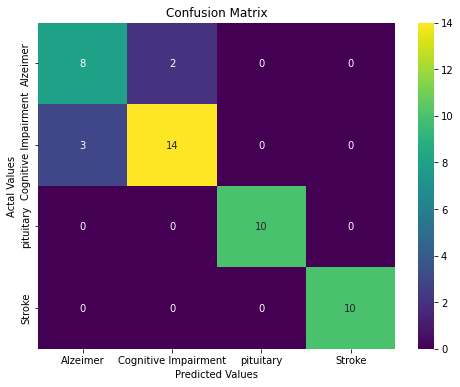

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
custom_cmap = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm_df, annot=True, cmap=custom_cmap)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [74]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [75]:
img=image.load_img('test_img.jpg',target_size=(224,224))

In [76]:
x=image.img_to_array(img)
x

array([[[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       ...,

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [15., 15., 15.],
        [16., 16., 16.],
        [16., 16., 16.]]

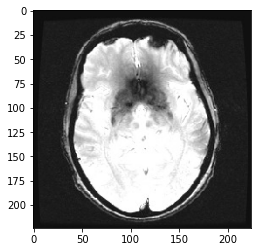

In [77]:
from matplotlib.pyplot import imshow
imshow(img)

In [78]:
x=x/255

In [79]:
x


array([[[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       ...,

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0

In [80]:
import cv2
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [81]:
x.shape

(1, 224, 224, 3)

In [82]:
model.predict(x)

1/1 [==============================] - 0s 331ms/step


array([[9.8011827e-01, 6.8385969e-03, 6.7367387e-04, 1.2369408e-02]],
      dtype=float32)

In [83]:
a=model.predict(x)

1/1 [==============================] - 0s 40ms/step


In [84]:
a.argmax()

0